In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from scipy.interpolate import interp1d
import pandas as pd

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from plot_params import params
pylab.rcParams.update(params)

cols_default = plt.rcParams['axes.prop_cycle'].by_key()['color']

/Users/smsharma/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/smsharma/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


# Fiducial bounds

## 1. Dark photons

In [3]:
m_Ap_DP, lim_DP = np.transpose(np.loadtxt("../data/constraints/fiducial_DP_FIRAS_one_plus_delta_1e2.csv", skiprows=2, delimiter=','))

In [4]:
jup_m, jup_eps = 10 ** np.transpose(pd.read_csv("../data/existing_constraints/Jupiter.txt", sep='\t').to_numpy())

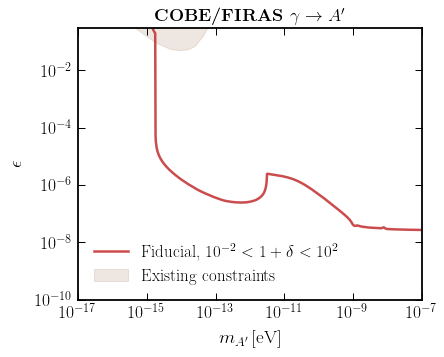

In [5]:
plt.plot(m_Ap_DP, lim_DP, label="Fiducial, $10^{-2} < 1 + \delta < 10^2$")
plt.fill_between(jup_m, jup_eps, np.ones_like(jup_eps), alpha=0.15, color=cols_default[6], label="Existing constraints")

plt.xscale("log")
plt.yscale("log")

plt.xlim(min(m_Ap_DP), max(m_Ap_DP))
plt.ylim(1e-10, 0.3)

plt.xlabel(r"$m_{A^\prime}$\,[eV]") 
plt.ylabel(r"$\epsilon$")

plt.title(r'\textbf{COBE/FIRAS $\gamma \rightarrow A^\prime$}')

plt.legend()

## 2. Dark photon dark matter

In [6]:
m_Ap_DP_DM, lim_DP_DM = np.transpose(np.loadtxt("../data/constraints/fiducial_DP_DM_HeII_one_plus_delta_1e2.csv", skiprows=2, delimiter=','))

In [7]:
delta_rho_cdm_limit   = np.loadtxt('../data/existing_constraints/delta_rho_cdm.csv', delimiter=',')
He_nonres_limit       = np.loadtxt('../data/existing_constraints/He_nonres.csv', delimiter=',')
mu_y_distortion_limit = np.loadtxt('../data/existing_constraints/mu_y_distortion.csv', delimiter=',')
DM_Radio_limit        = np.loadtxt('../data/existing_constraints/DM_Radio.csv', delimiter=',')

delta_rho_cdm_interp   = interp1d(delta_rho_cdm_limit[:,0],   delta_rho_cdm_limit[:,1],   bounds_error=False, fill_value=2.)
He_nonres_interp       = interp1d(He_nonres_limit[:,0],       He_nonres_limit[:,1],       bounds_error=False, fill_value=2.)
mu_y_distortion_interp = interp1d(mu_y_distortion_limit[:,0], mu_y_distortion_limit[:,1], bounds_error=False, fill_value=2.)

def existing_DP_DM_limits(m_Ap):
    
    lim_He_nonres       = He_nonres_interp(m_Ap)
    lim_mu_y_distortion = mu_y_distortion_interp(m_Ap)
    
    return np.minimum.reduce([lim_He_nonres, lim_mu_y_distortion])


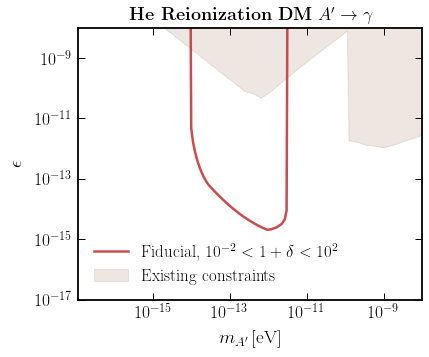

In [8]:
plt.plot(m_Ap_DP_DM, lim_DP_DM, label="Fiducial, $10^{-2} < 1 + \delta < 10^2$")
plt.fill_between(m_Ap_DP_DM, existing_DP_DM_limits(m_Ap_DP_DM), 2, alpha=0.15, color=cols_default[6], label="Existing constraints")

plt.xscale("log")
plt.yscale("log")

plt.xlim(min(m_Ap_DP_DM), max(m_Ap_DP_DM))
plt.ylim(1e-16, 0.3)

plt.xlabel(r"$m_{A^\prime}$\,[eV]") 
plt.ylabel(r"$\epsilon$")

plt.ylim(1e-17, 1e-8)

plt.title(r'\textbf{He Reionization DM} $A^\prime \to \gamma$')

plt.legend()